# Top NFT Collections

Hello! Here I perform an initial analysis of a Kaggle dataset Top NFT Collections available via https://www.kaggle.com/datasets/nenamalikah/nft-collections-by-sales-volume

# Introduction

NFT (Non Fungible Tokens) are units of data, which represent unique digital or non-digital assets along with their ownership. The items may be music, collectibles, videos, digital-diplomas, digital clothes and many more.  

It is principal that NFTs are unique and are stored on blockchains, which ensures their ownership at any particular moment and preserves the history of prior posession. Moreover NFTs may act as tickets allowing the holders to obtain goods or priveleges associated with the token and become members of the community. Eventually whole ecosystems emerge around NFTs and the most notable applications of NFT are soon-to-be. 

The dataset examined here is comprised of top NFT collections by sales volume. The data was pulled on January 16, 2022 and contains all time information for the top collections (since 2014). Note: items on the NFT market are organized in collections which fit to some category in accord with shared features. 

So let us begin!

# Data Overview

In [184]:
#First things first: load the libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import seaborn as sns
import statistics as st
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline 

In [185]:
#Read the file with Top NFT Collections data
df = pd.read_csv('/Users/gefen/Desktop/NFT_Top_Collections.csv')

In [186]:
#Let's check the columns and data types
df.dtypes

Index                  int64
Name                  object
Volume               float64
Volume_USD           float64
Market_Cap           float64
Market_Cap_USD       float64
Sales                  int64
Floor_Price          float64
Floor_Price_USD      float64
Average_Price        float64
Average_Price_USD    float64
Owners                 int64
Assets                 int64
Owner_Asset_Ratio    float64
Category              object
Website               object
Logo                  object
dtype: object

Here it's important to pause and examine the variables. The focus variable is, evidently, 'Sales', and prior to any calculations one should define the variables which are expected to make a significant impact on the 'Sales'. 

It's possible that the 'Assets' and 'Owners' variables are highly correlated with the 'Sales'. 'Assets' is the number of unique items in the collection, so the more items — the more putative sales. 'Owners' may work the same: since we deal with top collections, the number of unique owners is likely to be large, so higher 'Sales' may indicate more 'Owners'. To check this we shall examine the 'OwnerAssetRatio' variable. 

Besides 'Sales' is going to be tied to 'Market_Cap', which is a market capitalization — total value of the collection's items in circulation, since the market capitalization is dependent on the number of sold assets. Finally, the volume of sales from the NFT collection, which is 'Volume' is going to be interconnected with 'Sales' because total sales depend on sales volume and price. 

Now it's time to check our assumptions. 

Here we obtain brief descriptive statistics to summarize the characteristics of a data set for the variable 'Sales'. It gives information about measures of the center and measures of variability. 

In [187]:
#descriptive statistics summary
goal = 'Sales'
df[goal].describe()

count     592.000000
mean      164.491554
std       451.321395
min         0.000000
25%        11.000000
50%        35.000000
75%       107.250000
max      5229.000000
Name: Sales, dtype: float64

In [188]:
print ('Mode of Sales is', st.mode(df_train[goal]))
print ('Median of Sales is', st.median(df_train[goal]))
print ('Mean of Sales is', st.mean(df_train[goal]))
print ('Harmonic mean of Sales is', st.harmonic_mean(df_train[goal]))
print ('Median low of Sales is', st.median_low(df_train[goal]))
print ('Median high of Sales is', st.median_high(df_train[goal]))
print ('Median grouped of Sales is', st.median_grouped(df_train[goal]))
print ('Variance of Sales is', st.variance(df_train[goal]))
print ('Population variance of Sales is', st.pvariance(df_train[goal]))
print ('Standart deviation of Sales is', st.stdev(df_train[goal]))
print ('Population standart deviation of Sales is', st.pstdev(df_train[goal]))                                                                

Mode of Sales is 3
Median of Sales is 35.0
Mean of Sales is 164.49155405405406
Harmonic mean of Sales is 0
Median low of Sales is 35
Median high of Sales is 35
Median grouped of Sales is 34.785714285714285
Variance of Sales is 203691.00162059267
Population variance of Sales is 203346.92898272004
Standart deviation of Sales is 451.32139503971297
Population standart deviation of Sales is 450.94005032012853


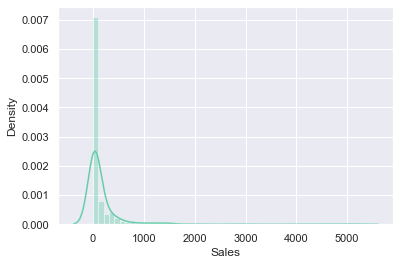

In [189]:
#histogram
sns.set_color_codes()
sns.distplot(df[goal], color='mediumaquamarine')

In [190]:
#skewness and kurtosis
print("Skewness: %f" % df[goal].skew())
print("Kurtosis: %f" % df[goal].kurt())

Skewness: 7.185343
Kurtosis: 66.720442


As seen from the plot and the calculations indeed it deviates from the normal distribution and the skewness is positive. And mode, median and mean are 3 < 35.0 < 164.49155405405406 respectively. Since the data is positively skewed, we can say that higher number of data points, i.e. Sales, is going to be significantly small (only a few collections are sold extensively). The kurtosis is definitely positive and our distribution is evidently 'heavy-tailed'.

# Intuitive assumptions

In the previous section we discussed how the expectations of 'Assets', 'Owners', 'Market_Cap' and 'Volume' impact 'Sales'. Now we shall plot the relationship of 'Sales' and these four variables. 

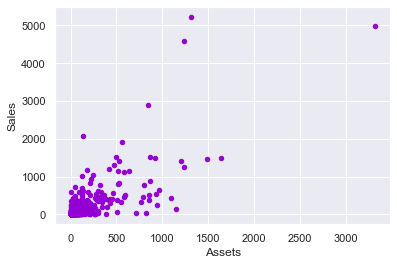

In [191]:
#scatter plot Assets/Sales
var = 'Assets'
data = pd.concat([df[goal], np.multiply(df[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal, color='darkviolet')

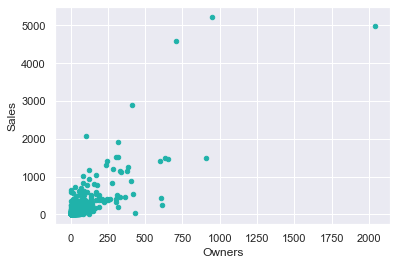

In [192]:
#scatter plot Owners/Sales
var = 'Owners'
data = pd.concat([df[goal], np.multiply(df[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal, color='lightseagreen')

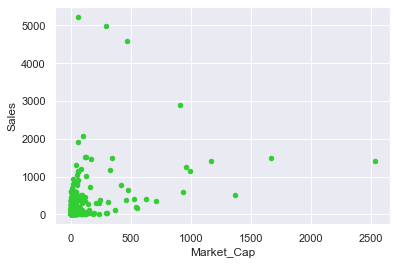

In [193]:
#scatter plot Market_Cap/Sales
var = 'Market_Cap'
data = pd.concat([df_train[goal], np.multiply(df_train[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal, color='limegreen')

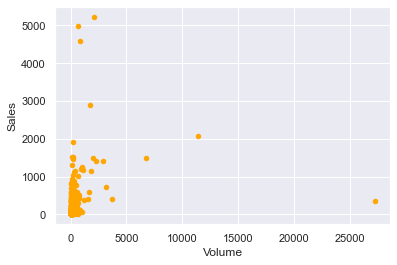

In [194]:
#scatter plot Volume/Sales
var = 'Volume'
data = pd.concat([df[goal], np.multiply(df[var], 1)], axis=1)
data.plot.scatter(x=var, y=goal, color='orange')

Both 'Owners' and 'Assets' show relatedness to 'Sales', however it's much affected by the nature of these variables. Precisely, we should consider that there are primary and secondary (and other subsequent) sales of the asset. (This dataset is likely to represent the primary sales.) Also the sales are dependent on the category the assets fall into. For example, art pieces are likely to be sold only a few times whilst tickets may be sold hundreds of times and the sizes of collections vary in accord with the category. So the observed not perfect linearity may be explained by the specifics of the data. However, it's a deeper study. 

Below are boxplots for 'Category' and 'Name': it's evident, that 'Category' shows that some items types have greater sales or greater amount of sales and it certainly varies across the dataset. All the 'Names' are different, so the plot doesn't seem particularly interesting. 

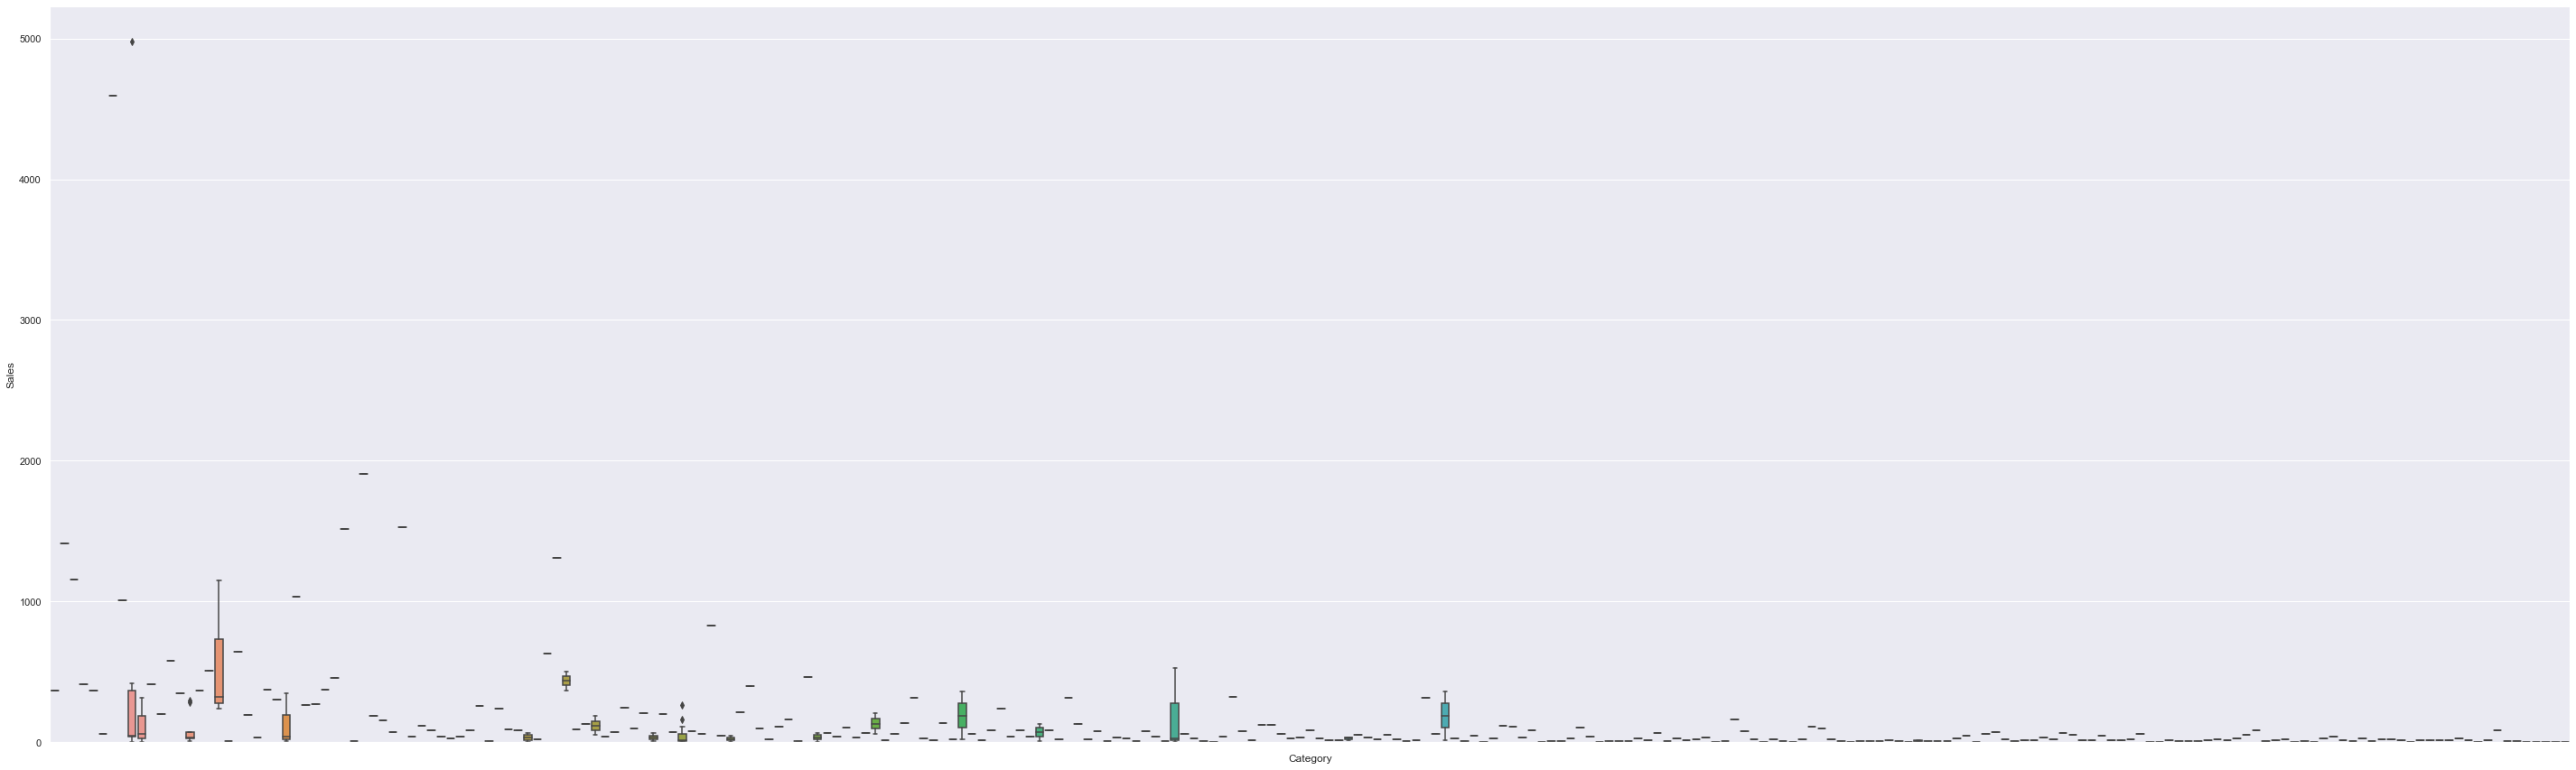

In [195]:
#box plot Category/Sales
var = 'Category'
data = pd.concat([df[goal], df[var]], axis=1)
f, ax = plt.subplots(figsize=(50, 15))
fig = sns.boxplot(x=var, y=goal, data=data)
fig.axis(ymin=0)
fig.set(xticklabels=[]);

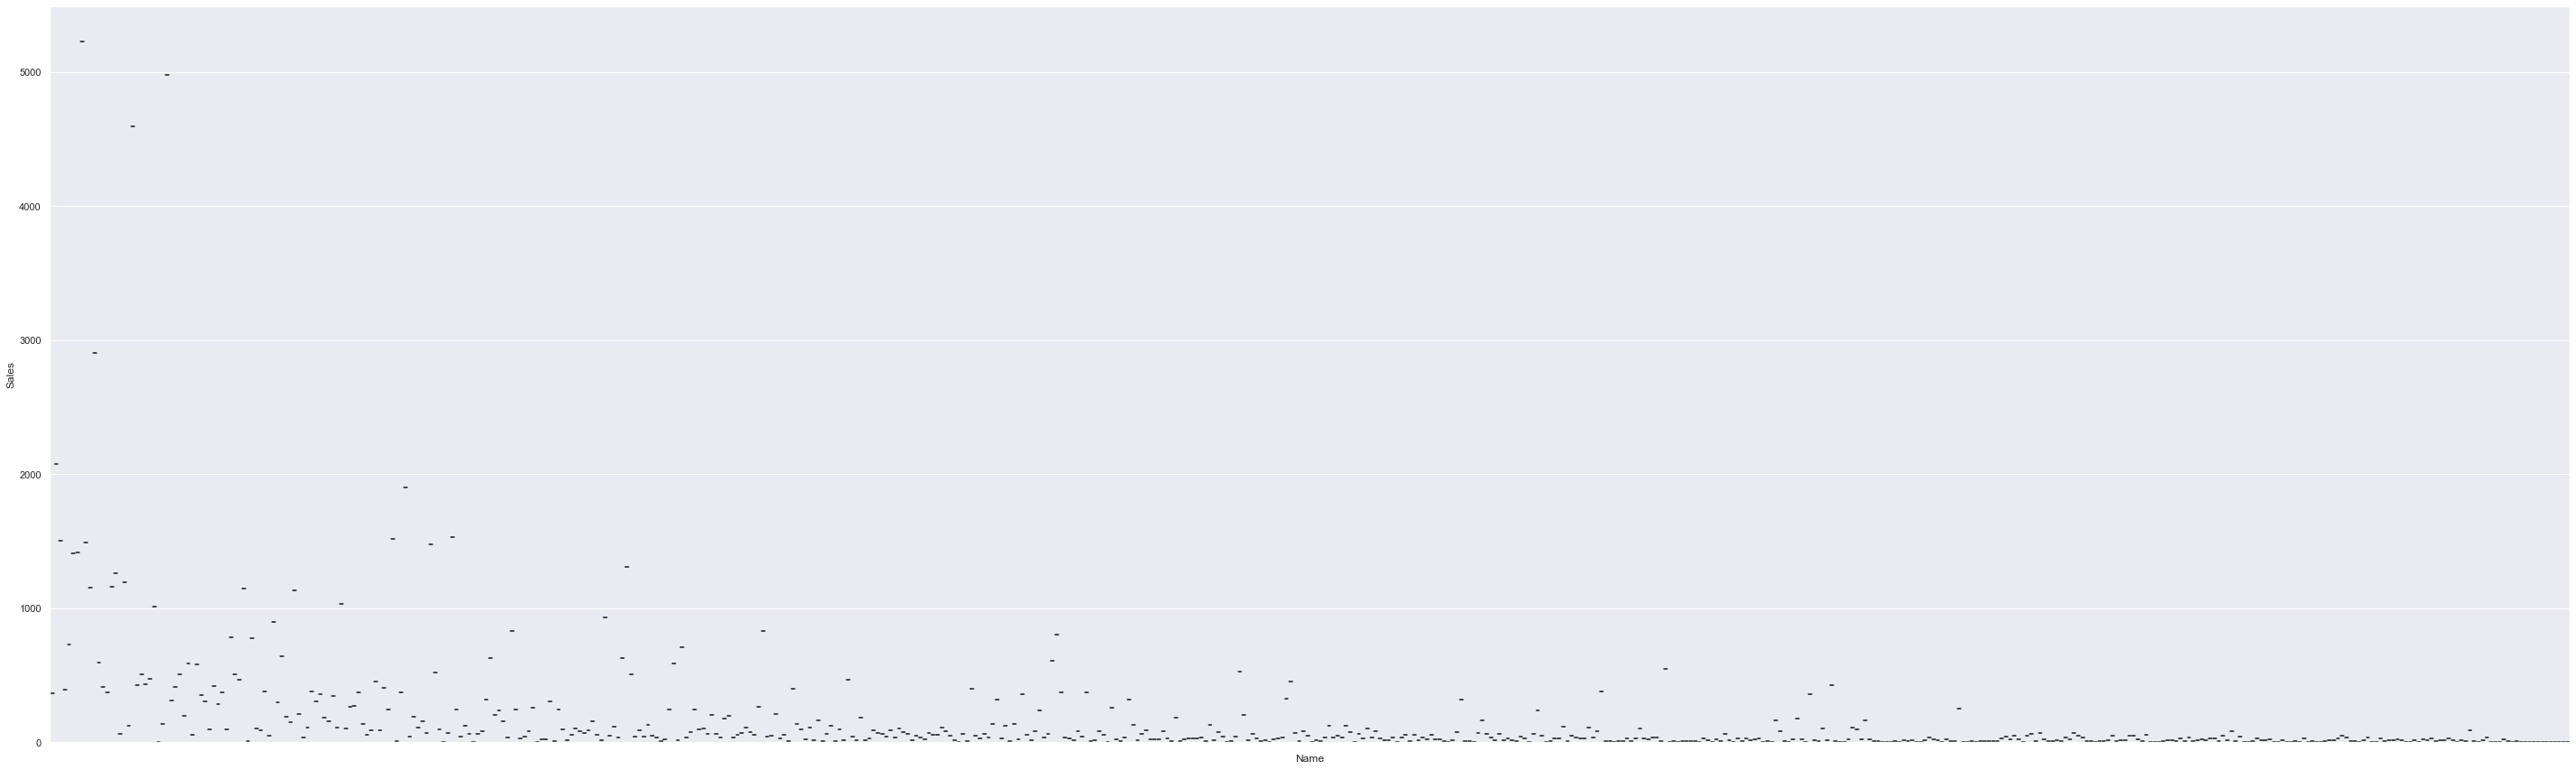

In [196]:
#box plot Name/Sales
var = 'Name'
data = pd.concat([df[goal], df[var]], axis=1)
f, ax = plt.subplots(figsize=(50, 15))
fig = sns.boxplot(x=var, y=goal, data=data)
fig.axis(ymin=0)
fig.set(xticklabels=[]);

To sum up: 'Assets' and 'Owners' seem to be quite related with 'Sales'. Both are positive, the density is higher around zero, and the dependency is more distinct in case of 'Assets': the line may be drawn to see the slope. We have also examined the box plots.

Market capitalization also shows relation with 'Sales', however, not so distinctly.


# Explicit check

Now let's draw heatmaps to see clearly, if our assumptions are consistent. 

1) The correlation matrix

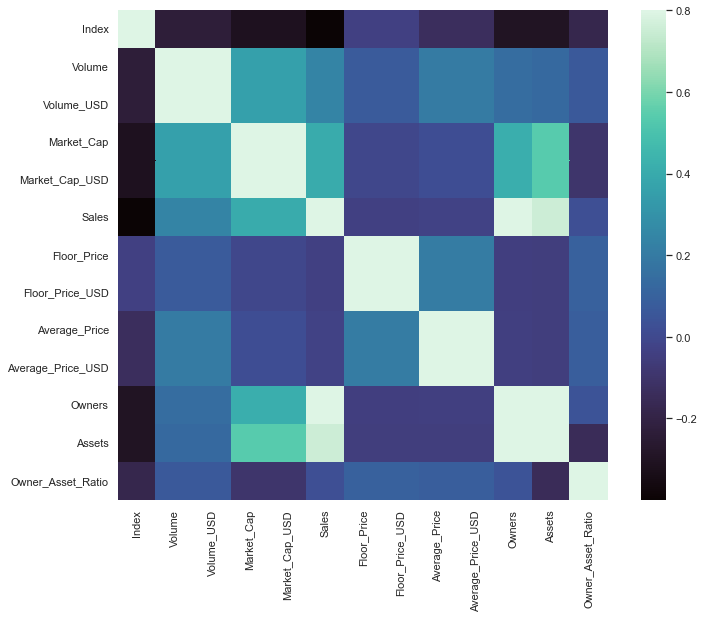

In [197]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True, cmap='mako')

2) 'Sales' correlation matrix

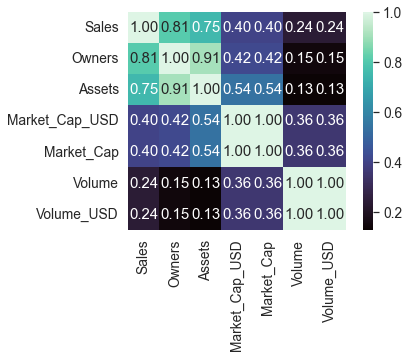

In [198]:
#Sales correlation matrix
k = 7 #number of variables for heatmap
cols = corrmat.nlargest(k, goal)[goal].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, square = True, annot=True, fmt='.2f', yticklabels=cols.values, xticklabels=cols.values, cmap='mako')
plt.show()

So, our hypothesis about 'Sales' and 'Owners', 'Assets' relation is evidently quite consistent. The least related in the row is Volume. 

3) Scatterplot!

We continue to explore pairwise relationships is the dataset.

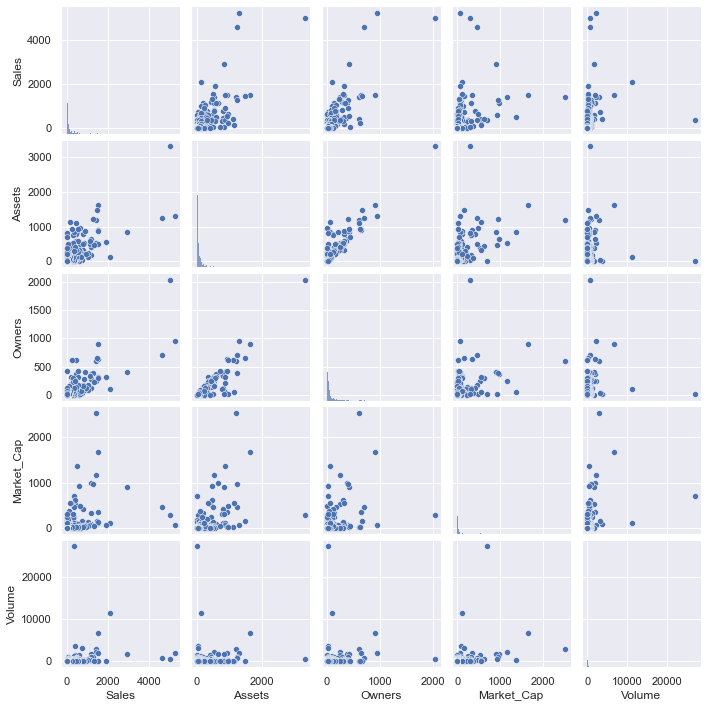

In [199]:
sns.set()
cols = ['Sales', 'Assets', 'Owners', 'Market_Cap', 'Volume']
sns.pairplot(df[cols], size=2, dropna=True)
plt.show();

Besides everything mentioned earlier this plot shows strong relationship between assets and owners.

# What's missing

Definitely we need to deal with missing data. First let's examine the dataset:

In [200]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Category,282,0.476351
Website,111,0.187500
Owner_Asset_Ratio,49,0.082770
Floor_Price_USD,48,0.081081
Floor_Price,48,0.081081
Logo,1,0.001689
Average_Price_USD,0,0.000000
Average_Price,0,0.000000
Owners,0,0.000000
Assets,0,0.000000


So, almost half the data is uncategorized, other categorical information ('Website') is missing. Since we don't use this data for actual analysis, we may get rid of it for now. Now we may clean the dataset. 

First we remove the missing data:

In [201]:
#dealing with missing data
df_train = df.drop((missing_data[missing_data['Total'] > 1]).index,1)
df_train = df.drop(df_train.loc[df_train['Logo'].isnull()].index)
df_train.isnull().sum().max()

281

For further calculations we are going to standartize the data, i.e. convert the values so, that the mean is 0 and standart deviation is 1. 

In [202]:
#standardizing data
Sale_scaled = StandardScaler().fit_transform(df[goal][:,np.newaxis]);
low_range = Sale_scaled[Sale_scaled[:,0].argsort()][:10]
high_range= Sale_scaled[Sale_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-0.36477477]
 [-0.36477477]
 [-0.36477477]
 [-0.36477477]
 [-0.36477477]
 [-0.36477477]
 [-0.36477477]
 [-0.36477477]
 [-0.36477477]
 [-0.36255718]]

outer range (high) of the distribution:
[[ 2.93721626]
 [ 2.9704801 ]
 [ 2.992656  ]
 [ 3.02591984]
 [ 3.85751597]
 [ 4.23672381]
 [ 6.07954083]
 [ 9.82726738]
 [10.67882181]
 [11.23100164]]


Just like the kurtosis! We see that low-range values are similar and lay close to 0. High-range values are far from 0 and spread farther. 

# Closer [multivariate] look

Now I invite you to look closer at the 'Sales' and do the multivariate analysis. First of all, we will make sure that (or if) the data is normal, i.e. looks like normal distribution, however, univariately. Then we'll look at the levels of variance in the variables in focus, asess the linearity by looking at the scatter plots to spot the linear patterns, and search for the correlated errors (hoping for their absence). 

1) 'Sales'

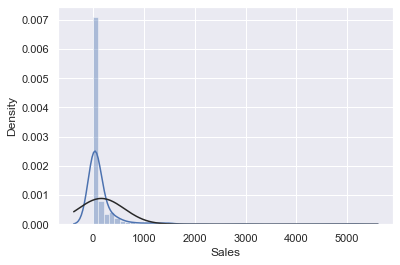

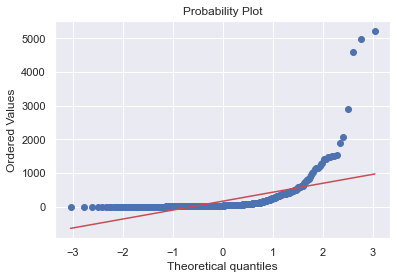

In [203]:
#histogram and normal probability plot
sns.distplot(df[goal], fit = stats.norm);
fig = plt.figure()
res = stats.probplot(df[goal], plot=plt)

In [213]:
#applying log transformation
df[goal] = np.log(df[goal]+0.37)
# I add a constant, here 0.37, because of the log transformation, to avoid eternities. 

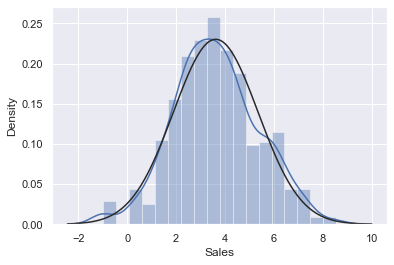

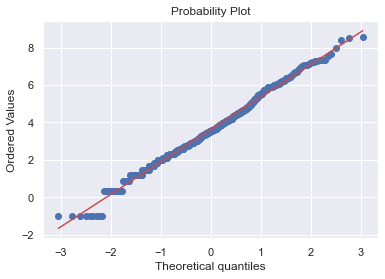

In [205]:
#transformed histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df[goal], fit=norm);
fig = plt.figure()
res = stats.probplot(df[goal], plot=plt)

2) 'Assets'

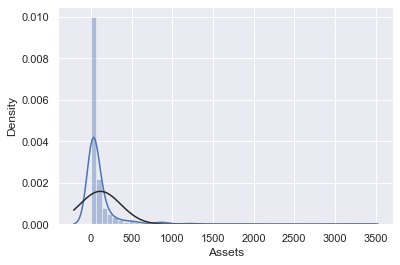

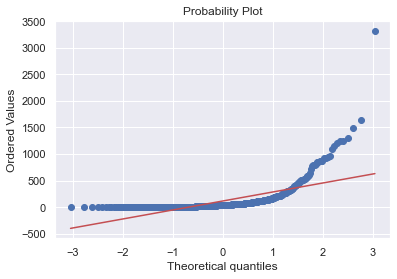

In [206]:
#histogram and normal probability plot
sns.distplot(df['Assets'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Assets'], plot=plt)

In [207]:
#data transformation
df['Assets'] = np.log(df['Assets']+1)

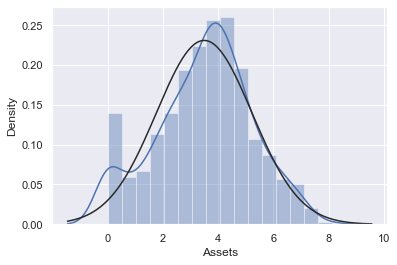

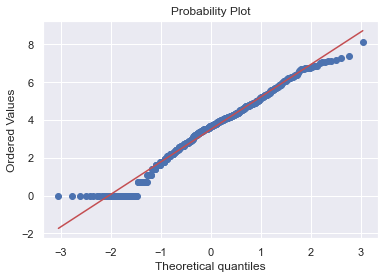

In [208]:
#transformed histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df['Assets'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Assets'], plot=plt)

3) 'Owners'

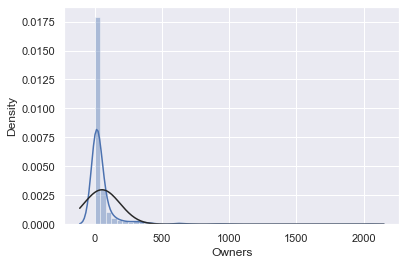

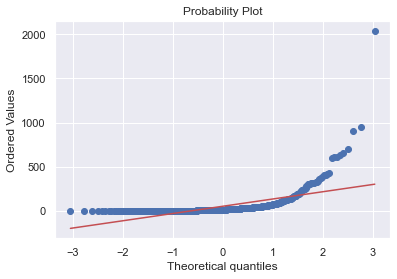

In [209]:
#histogram and normal probability plot
sns.distplot(df['Owners'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Owners'], plot=plt)

In [212]:
#data transformation
df['Owners'] = np.log(df['Owners']+1)

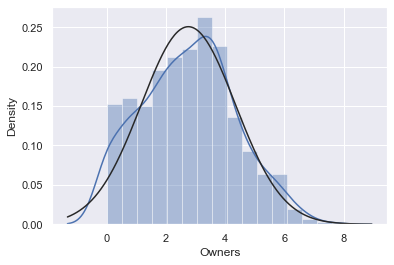

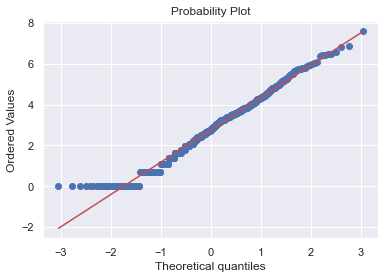

In [211]:
#transformed histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df['Owners'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Owners'], plot=plt)

4) 'Market_Cap' (just for the triple-check, the relationship is expected to be low)

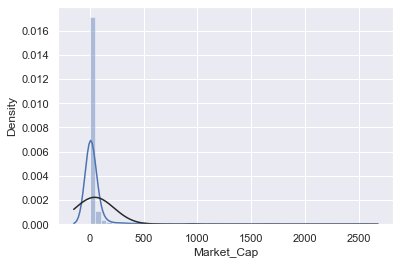

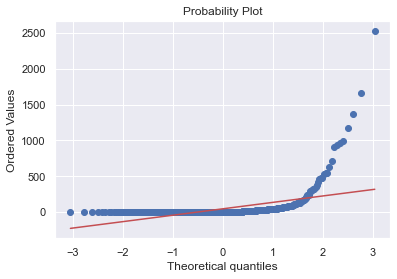

In [215]:
#histogram and normal probability plot
sns.distplot(df['Market_Cap'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Market_Cap'], plot=plt)

In [216]:
#data transformation
df['Market_Cap'] = np.log(df['Market_Cap']+1)

And just as expected...

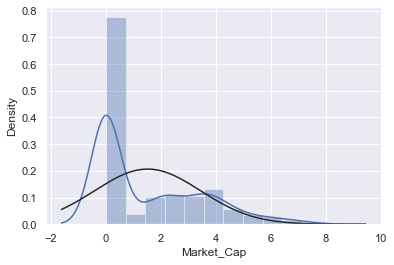

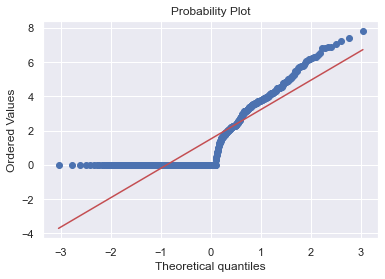

In [218]:
#transformed histogram and normal probability plot
from scipy.stats import norm
sns.distplot(df['Market_Cap'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['Market_Cap'], plot=plt)

Now let's look at the variance at graphs. Here we go:

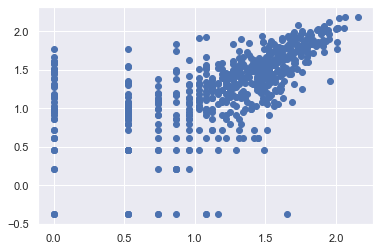

In [220]:
#scatter plot
plt.scatter(df['Owners'], df['Sales']);

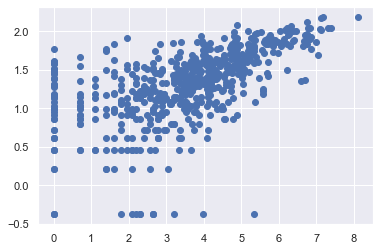

In [221]:
#scatter plot
plt.scatter(df['Assets'], df['Sales']);

So, after normalization our data at the scatter plots shows more density, and the variables are indeed correlated. That's it!

Thanks for reading!

# Useful references

Nadini, M., Alessandretti, L., Di Giacinto, F. et al. Mapping the NFT revolution: market trends, trade networks, and visual features. Sci Rep 11, 20902 (2021). 

https://ethereum.org/en/nft/

https://hbr.org/2021/11/how-nfts-create-value